In [1]:
import os
import cv2
import matplotlib.pyplot as plt

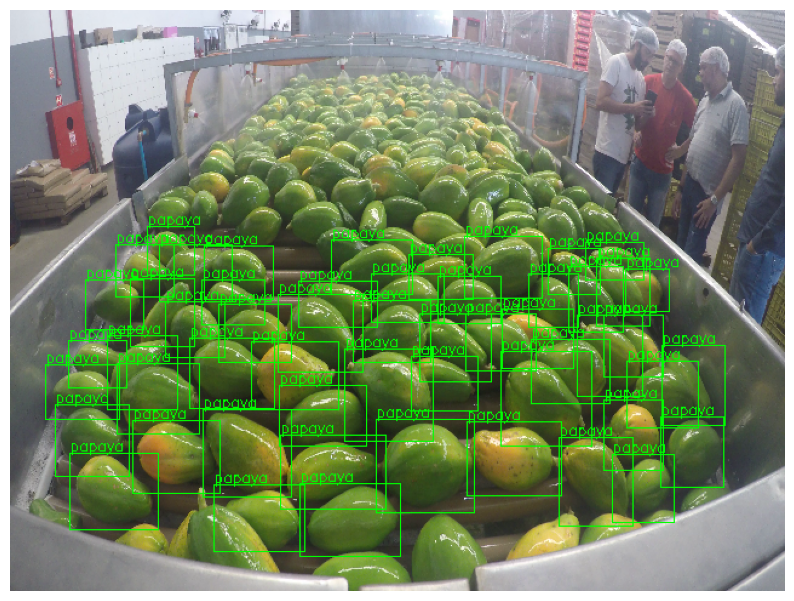

In [15]:
class_map = {0: 'papaya'}

def plot_images_with_labels(image_dir, label_dir, n):
    # Get list of image files
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))][:n]

    for image_file in image_files:
        # Load image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Could not read image {image_path}")
            continue
        # Convert BGR (OpenCV default) to RGB for matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, _ = image.shape

        # Corresponding label file
        label_file = os.path.splitext(image_file)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)

        # Check if label file exists
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    # Each line in YOLO format: class x_center y_center width height
                    tokens = line.strip().split()
                    if len(tokens) != 5:
                        print(f"Invalid label format in {label_path}")
                        continue
                    class_id, x_center, y_center, bbox_width, bbox_height = map(float, tokens)
                    class_id = class_map.get(int(class_id), int(class_id))

                    # Convert normalized coordinates to pixel values
                    x_center *= width
                    y_center *= height
                    bbox_width *= width
                    bbox_height *= height

                    # Calculate top-left and bottom-right coordinates
                    x_min = int(x_center - bbox_width / 2)
                    y_min = int(y_center - bbox_height / 2)
                    x_max = int(x_center + bbox_width / 2)
                    y_max = int(y_center + bbox_height / 2)

                    # Draw rectangle and label
                    cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), color=(0, 255, 0), thickness=1)
                    cv2.putText(image_rgb, str(class_id), (x_min, y_min - 2),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)
        else:
            print(f"No label file found for {image_file}")

        # Display the image
        plt.figure(figsize=(10, 10))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

# Paths to your image and label directories
train_image_dir = 'dataset/images/train'
train_label_dir = 'dataset/labels/train'

# Plot images with labels from the training set
plot_images_with_labels(train_image_dir, train_label_dir, n=1)
